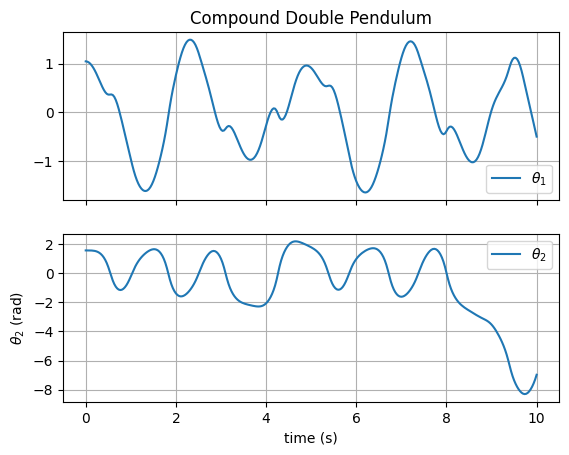

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# assign constants
g = 9.81

# our system of differential equations
def double_compound_pend_ODE(t, y):
    theta1 = y[0]
    theta1_dot = y[1]
    theta2 = y[2]
    theta2_dot = y[3]

    # see derivation.ipynb for details
    theta1_ddot = (-54.0*g*np.sin(theta1) - 6.0*g*np.sin(theta1 + theta2) + 18.0*g*np.sin(theta1 + 2*theta2) + 18.0*theta1_dot**2*np.sin(theta2) + 18.0*theta1_dot**2*np.sin(2*theta2) + 48.0*theta1_dot*theta2_dot*np.sin(theta2) + 24.0*theta2_dot**2*np.sin(theta2))/(-36.0*np.cos(theta2)**2 + 12.0*np.cos(theta2) + 67.0)
    theta2_ddot = (36.0*g*np.sin(theta1) + 54.0*g*np.sin(theta1 - theta2) - 42.0*g*np.sin(theta1 + theta2) - 18.0*g*np.sin(theta1 + 2*theta2) - 114.0*theta1_dot**2*np.sin(theta2) - 36.0*theta1_dot**2*np.sin(2*theta2) - 36.0*theta1_dot*theta2_dot*np.sin(theta2) - 36.0*theta1_dot*theta2_dot*np.sin(2*theta2) - 18.0*theta2_dot**2*np.sin(theta2) - 18.0*theta2_dot**2*np.sin(2*theta2))/(-36.0*np.cos(theta2)**2 + 12.0*np.cos(theta2) + 67.0)

    return (
        theta1_dot,
        theta1_ddot,
        theta2_dot,
        theta2_ddot
    )

# solve the ODE
fps = 30
x0 = np.array([np.pi/3, 0, np.pi/2, 0])
tfinal = 10

sol = solve_ivp(double_compound_pend_ODE, [0, tfinal], x0, t_eval=np.linspace(0,tfinal,tfinal*fps+1))

# output of the solver
theta1 = sol.y[0]
theta2 = sol.y[2]
t = sol.t

# create two subplots: one for x and one for theta
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(t, theta1, label="$\\theta_1$")
ax1.legend()
ax1.grid()
ax1.set_title('Compound Double Pendulum')
ax2.set_ylabel("$\\theta_1$ (rad)")

ax2.plot(t, theta2, label="$\\theta_2$")
ax2.legend()
ax2.grid()
ax2.set_xlabel("time (s)")
ax2.set_ylabel("$\\theta_2$ (rad)")

plt.show()

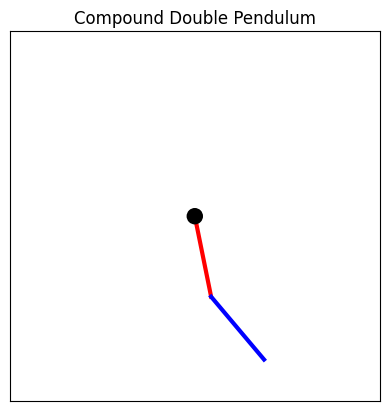

In [2]:
# create an image of the pendulum at a particular state
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-2.25, 2.25)
ax.set_ylim(-2.25, 2.25)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title('Compound Double Pendulum')

# state to visualize
theta1 = 0.2
theta2 = 0.5

# define coordinate transforms
Tsa = np.array([[np.cos(theta1), -np.sin(theta1), np.sin(theta1)],
          [np.sin(theta1), np.cos(theta1), -np.cos(theta1)],
          [0, 0, 1]])
Tab = np.array([[np.cos(theta2), -np.sin(theta2), np.sin(theta2)],
          [np.sin(theta2), np.cos(theta2), -np.cos(theta2)],
          [0, 0, 1]])
Tsb = Tsa @ Tab

p1 = Tsa @ np.array([0,0,1])
p2 = Tsb @ np.array([0,0,1])

p0 = (0,0)
p1 = p1[:2]
p2 = p2[:2]

# circles
origin = ax.add_patch(plt.Circle( p0, 0.1, fc='k', zorder=3))
stick1 = ax.add_line(Line2D( (p0[0],p1[0]), (p0[1],p1[1]), color='r', linewidth=3, zorder=1))
stick2 = ax.add_line(Line2D( (p1[0],p2[0]), (p1[1],p2[1]), color='b', linewidth=3, zorder=1))

plt.show()

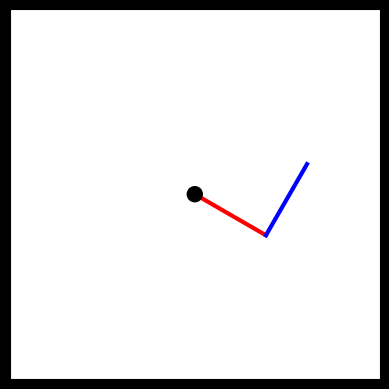

In [3]:
# Animate the spring pendulum
import matplotlib.animation as animation

# output of the solver
theta1_data = sol.y[0]
theta2_data = sol.y[2]
t_data = sol.t

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.figure.set_facecolor('k')
ax.figure.set_edgecolor('k')
ax.set_xlim(-2.25, 2.25)
ax.set_ylim(-2.25, 2.25)
ax.set_yticks([])
ax.set_xticks([])

theta1 = theta1_data[0]
theta2 = theta2_data[0]

# circles
p1 = np.zeros(3)
p2 = np.zeros(3)
origin = ax.add_patch(plt.Circle( p0, 0.1, fc='k', zorder=3))
stick1 = ax.add_line(Line2D( (p0[0],p1[0]), (p0[1],p1[1]), color='r', linewidth=3, zorder=1))
stick2 = ax.add_line(Line2D( (p1[0],p2[0]), (p1[1],p2[1]), color='b', linewidth=3, zorder=1))

# animate each frame "i"
def animate(i):

    theta1 = theta1_data[i]
    theta2 = theta2_data[i]
    t = t_data[i]

    # update pendulum position
    Tsa = np.array([[np.cos(theta1), -np.sin(theta1), np.sin(theta1)],
          [np.sin(theta1), np.cos(theta1), -np.cos(theta1)],
          [0, 0, 1]])
    Tab = np.array([[np.cos(theta2), -np.sin(theta2), np.sin(theta2)],
            [np.sin(theta2), np.cos(theta2), -np.cos(theta2)],
            [0, 0, 1]])
    Tsb = Tsa @ Tab

    p1 = Tsa @ np.array([0, 0, 1])
    p2 = Tsb @ np.array([0, 0, 1])

    # update graphics
    stick1.set_data((0,p1[0]), (0,p1[1]))
    stick2.set_data((p1[0],p2[0]), (p1[1],p2[1]))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save('double_compound_pend.gif', writer=ffmpeg_writer)

Moviepy - Building video 1000_compound_pendulums.mp4.
Moviepy - Writing video 1000_compound_pendulums.mp4



Moviepy - Done !
Moviepy - video ready 1000_compound_pendulums.mp4


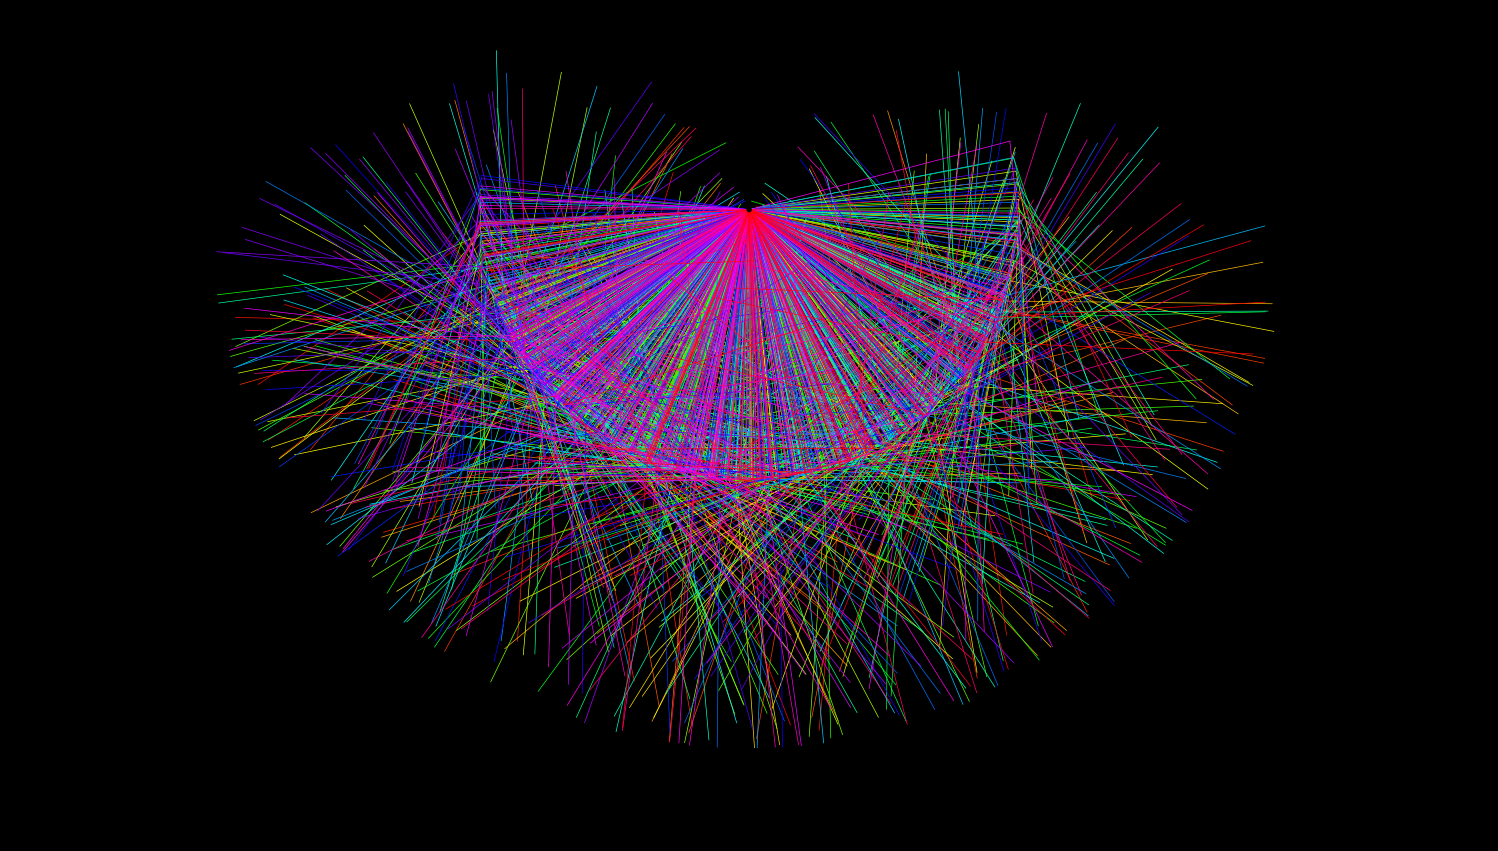

In [4]:
# now let's simulate 1000 double pendulums at once
# from progress.bar import Bar
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import hsv_to_rgb
import matplotlib.animation as animation

# pip install moviepy
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

N = 1000
tfinal = 15
fps = 30
num_frames = tfinal*fps + 1

class DoublePend():
    def __init__(self, x0):
        self.x0 = x0

    def simulate(self, tfinal=30, num_frames=901):
        sol = solve_ivp(double_compound_pend_ODE, [0, tfinal], self.x0, t_eval=np.linspace(0,tfinal,num_frames))
        self.theta1 = sol.y[0]
        self.theta2 = sol.y[2]
        self.t = sol.t

    def assign_handles(self, stick1, stick2):
        self.stick1 = stick1
        self.stick2 = stick2

    def update_handles(self, i):
        # "i" is the frame number
        theta1 = self.theta1[i]
        theta2 = self.theta2[i]

        Tsa = np.array([[np.cos(theta1), -np.sin(theta1), np.sin(theta1)],
          [np.sin(theta1), np.cos(theta1), -np.cos(theta1)],
          [0, 0, 1]])
        Tab = np.array([[np.cos(theta2), -np.sin(theta2), np.sin(theta2)],
                [np.sin(theta2), np.cos(theta2), -np.cos(theta2)],
                [0, 0, 1]])
        Tsb = Tsa @ Tab

        p1 = Tsa @ np.array([0, 0, 1])
        p2 = Tsb @ np.array([0, 0, 1])

        self.stick1.set_data((0,p1[0]), (0,p1[1]))
        self.stick2.set_data((p1[0],p2[0]), (p1[1],p2[1]))


# create N double pendulums
pends = [DoublePend(x0=np.array([np.pi/3, 0, np.pi/2+np.deg2rad(0.5)*i/N, 0])) for i in range(N)]
for pend in pends:
    pend.simulate(tfinal=tfinal, num_frames=num_frames)

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.figure.set_size_inches(1920/100, 1080/100)
ax.figure.set_dpi(100)
ax.figure.set_facecolor('k')
ax.figure.set_edgecolor('k')
ax.set_xlim(-19.2/7, 19.2/7)
ax.set_ylim(-10.8/7-0.8, 10.8/7-0.8)
ax.set_yticks([])
ax.set_xticks([])

origin = ax.add_patch(plt.Circle( (0,0), 0.01, fc='k', zorder=3))
background = ax.add_patch(plt.Rectangle( (-10,-10), 20, 20, fc='k', zorder=0))

for i,pend in enumerate(pends):
    rainbow_color = hsv_to_rgb((i/N,1,1))
    stick1 = ax.add_line(Line2D( (0,0), (0,0), color=rainbow_color, linewidth=0.5, zorder=1))
    stick2 = ax.add_line(Line2D( (0,0), (0,0), color=rainbow_color, linewidth=0.5, zorder=1))
    pend.assign_handles(stick1, stick2)

# animate each frame "i"
frame_number = 0
def make_frame(t):

    global frame_number

    for pend in pends:
        pend.update_handles(frame_number)
        
    frame_number += 1
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=tfinal)
animation.write_videofile(f'{N}_compound_pendulums.mp4', fps=fps)

Moviepy - Building video 1000_compound_pendulum_slow.mp4.
Moviepy - Writing video 1000_compound_pendulum_slow.mp4



Moviepy - Done !
Moviepy - video ready 1000_compound_pendulum_slow.mp4


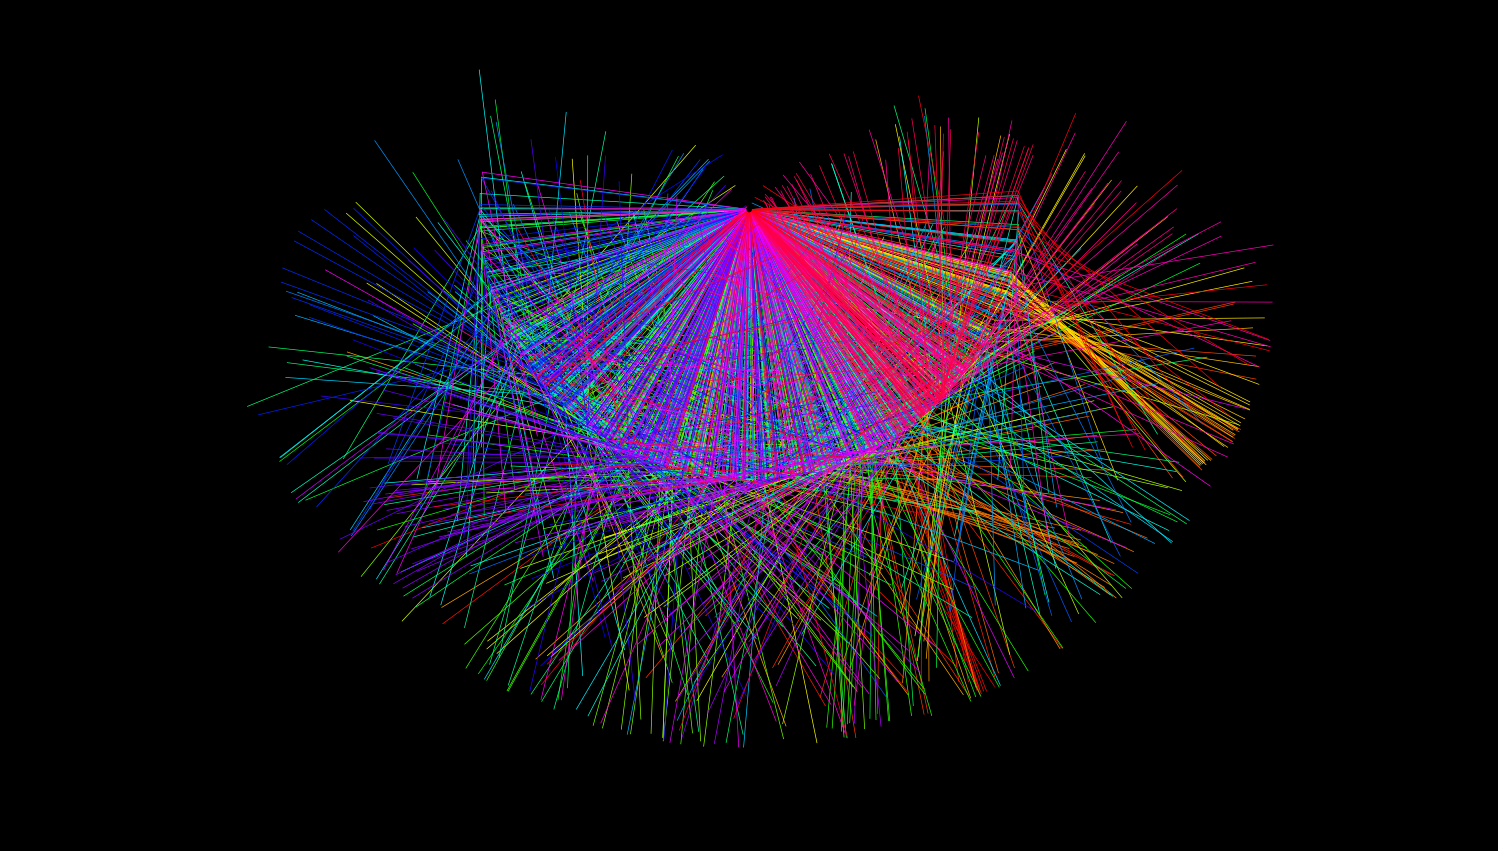

In [5]:
# slow motion pendulum (0.25 speed)
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import hsv_to_rgb
import matplotlib.animation as animation

# pip install moviepy
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

N = 1000
tfinal = 10
speed = 0.25
fps = 30
num_frames = 1 + int(tfinal*fps/speed)

class DoublePend():
    def __init__(self, x0):
        self.x0 = x0

    def simulate(self, tfinal=30, num_frames=901):
        sol = solve_ivp(double_compound_pend_ODE, [0, tfinal], self.x0, t_eval=np.linspace(0,tfinal,num_frames))
        self.theta1 = sol.y[0]
        self.theta2 = sol.y[2]
        self.t = sol.t

    def assign_handles(self, stick1, stick2):
        self.stick1 = stick1
        self.stick2 = stick2

    def update_handles(self, i):
        # "i" is the frame number
        theta1 = self.theta1[i]
        theta2 = self.theta2[i]

        Tsa = np.array([[np.cos(theta1), -np.sin(theta1), np.sin(theta1)],
          [np.sin(theta1), np.cos(theta1), -np.cos(theta1)],
          [0, 0, 1]])
        Tab = np.array([[np.cos(theta2), -np.sin(theta2), np.sin(theta2)],
                [np.sin(theta2), np.cos(theta2), -np.cos(theta2)],
                [0, 0, 1]])
        Tsb = Tsa @ Tab

        p1 = Tsa @ np.array([0, 0, 1])
        p2 = Tsb @ np.array([0, 0, 1])

        self.stick1.set_data((0,p1[0]), (0,p1[1]))
        self.stick2.set_data((p1[0],p2[0]), (p1[1],p2[1]))


# create N double pendulums
pends = [DoublePend(x0=np.array([np.pi/3, 0, np.pi/2+np.deg2rad(0.5)*i/N, 0])) for i in range(N)]
for pend in pends:
    pend.simulate(tfinal=tfinal, num_frames=num_frames)

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.figure.set_size_inches(1920/100, 1080/100)
ax.figure.set_dpi(100)
ax.figure.set_facecolor('k')
ax.figure.set_edgecolor('k')
ax.set_xlim(-19.2/7, 19.2/7)
ax.set_ylim(-10.8/7-0.8, 10.8/7-0.8)
ax.set_yticks([])
ax.set_xticks([])

origin = ax.add_patch(plt.Circle( (0,0), 0.01, fc='k', zorder=3))
background = ax.add_patch(plt.Rectangle( (-10,-10), 20, 20, fc='k', zorder=0))

for i,pend in enumerate(pends):
    rainbow_color = hsv_to_rgb((i/N,1,1))
    stick1 = ax.add_line(Line2D( (0,0), (0,0), color=rainbow_color, linewidth=0.5, zorder=1))
    stick2 = ax.add_line(Line2D( (0,0), (0,0), color=rainbow_color, linewidth=0.5, zorder=1))
    pend.assign_handles(stick1, stick2)

frame_number = 0
def make_frame(t):

    global frame_number

    for pend in pends:
        pend.update_handles(frame_number)
        
    frame_number += 1
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=tfinal/speed) # 10 * 4 seconds
animation.write_videofile(f'{N}_compound_pendulum_slow.mp4', fps=fps) # 30 fps